In [ ]:
options(jupyter.rich_display = FALSE)

# LAB 08: LISTS

## QUESTION 1

Let's create a randomly generated list of numeric vectors as such:

```R
RNGversion("3.3.1")
set.seed(20)
listx <- split(sample(100, 20, replace = T), sample(sample(3:5, 1), 20, replace = T))
listx

$`1`
[1] 88 28 97  8  1

$`2`
[1] 77 53 38 72 20 46 29

$`3`
[1] 33 75 11 82

$`4`
[1] 99 10 76 33
```

Write a function called **first**, that takes a single argument **lst**, a list object, and returns the first element of each vector item as such: 

```R
first(lst = listx)

 1  2  3  4 
88 77 33 99 

```
*Hint: You can use the ``sapply()`` function and the ``function(x)`` notation inside ``sapply()``.*

## SOLUTION 1

In [ ]:
RNGversion("3.3.1")
set.seed(20)
listx <- split(sample(100, 20, replace = T), sample(sample(3:5, 1), 20, replace = T))
listx

first <- function(lst)
{
    sapply(lst, function(x) x[1])
}
           
first(lst = listx)

## QUESTION 2

Suppose a reading assignment is given as a mixture of single page numbers and ranges of page numbers (two item vectors). e.g. "Read page 1, pages 3 to 5, page 7, and pages 13 to 16".


You can store this assignment as a list of vectors where:

- Single page numbers are denoted as one itemed vectors.
- Ranges of page numbers are denoted as two itemed vectors. Note that the page numbers implied by the range are a sequence from the smaller value to the larger value. 

Your task is to write a general function called **ranges_to_numbers** that takes a single argument  **L**, a list described as above and returns a vector of integers combining the numbers and intervals.

Here is an example:

```R
L1 <- list(1, c(3,5), 7, c(13, 16))

ranges_to_numbers(L = L1)

[1] 1 3 4 5 7 13 14 15 16 
```
The function should be general, that is, it should handle lists of any length. You can assume that list elements are either single integers, or integer vectors of length 2. You can also assume that the second element of range vectors is always larger.

The output should be sorted and there should be no duplicates.

*Hint: You can use the `unique()` function to avoid returning duplicates.*

## SOLUTION 2

In [ ]:
ranges_to_numbers <- function(L){
    res <- c()
    for (i in L){
        if (length(i) == 1){
            res <- c(res,i)
        } else { 
            res <- c(res, i[1]:i[2])
        }
    }
    unique(sort(res))
}
L1 <- list(1, c(3,5), 7, c(13, 16))
ranges_to_numbers(L = L1)

## QUESTION 3

Here is a stemmed version of Atatürk's address to youth:

In [ ]:
address_to_youth <- "türk gençlik birinci vazife türk istiklâl türk cumhuriyet ilelebed
muhafaza müdafaa mevcudiyet istikbâl yegâne temel temel sen kıymetli hazine istikbal
sen hazine mahrum istemek dahili harici bedhah istiklâl cumhuriyet müdafaa mecburiyet
vazife vaziyet imkân şerâit düşünmek imkân şerâit nâmüsait mahiyet tezâhür istiklâl
cumhuriyet kastetmek düşman bütün dünya emsal görülmek galibiyet mümessil olmak cebren
hile aziz vatan kale zaptetmek tersane girilmek ordu dağıtmak memleket köşe bi'l-fiil
işgal şerâit elîm vahîm memleketin dahili iktidar sahip gaflet dalâlet hıyanet iktidar
sahip şahsî menfaat müstevlî siyasi emel tevhit millet fakrü zaruret harap bitap türk
istikbâl evlât ahvâl şerâit vazife türk istiklâl cumhuriyet kurtarmak muhtaç kudret
damar asil kan mevcut"

First, let's split the address into words as such:

```R
address_words <- unlist(strsplit(address_to_youth, split = " "))
address_words <- unlist(strsplit(address_words, split = "\\n"))
address_words

[1] "türk"       "gençlik"    "birinci"    "vazife"     "türk"       "istiklâl"   "türk"       "cumhuriyet"
[9] "ilelebed"   "muhafaza"   "müdafaa"    "mevcudiyet" "istikbâl"   "yegâne"     "temel"      "temel"  
.
.
.


length(address_words)

[1] 105
```
After cleaning the text, we have 105 words.

Now let's write a function called **wordlist** that takes only one argument, a character vector, and iterates through all words and returns a list that shows the indices of every word in the given character vector as such:


```R
wordlist(address_words)

$türk
[1]  1  5  7 90 96

$gençlik
[1] 2

$birinci
[1] 3

$vazife
[1]  4 32 95

$istiklâl
[1]  6 28 42 97
.
.
.
```

This means for example, the word **vazife** appears three times in the given text: first as the 4th word, then as the 32nd word and lastly as the 95th word.

*Hint: Length of this list should be equal to the number of unique words in the character vector.*

## SOLUTION 3

In [ ]:
wordlist <- function(words)
{
    wordlist <- list()
    
    for (w in seq_along(words))
    {
        wordx <- words[w]
        wordlist[[wordx]] <- c(wordlist[[wordx]], w)
    }
    
    return(wordlist)
    
}

wordlist(address_words)

## QUESTION 4

First, assign the output of the previous function to an object called **address_list** as such:

```R
address_list <- wordlist(address_words)
```
Now let's check the number of unique words in the address:

```R
length(address_list)

[1] 81
```

So we have 81 unique words out of 105.

First, get the vector of frequencies of each unique word as such:

```R
address_freq
      türk    gençlik    birinci     vazife   istiklâl cumhuriyet   ilelebed   muhafaza    müdafaa mevcudiyet   istikbâl 
         5          1          1          3          4          4          1          1          2          1          2 
    yegâne      temel        sen   kıymetli     hazine   istikbal     mahrum    istemek     dahili     harici     bedhah 
         1          2          2          1          2          1          1          1          2          1          1 
.
.
.
```
*Hint: You can use ``length()`` and ``sapply()`` functions.*

Then draw a barplot of the words that appear at least twice in the address, in decreasing order, as such:


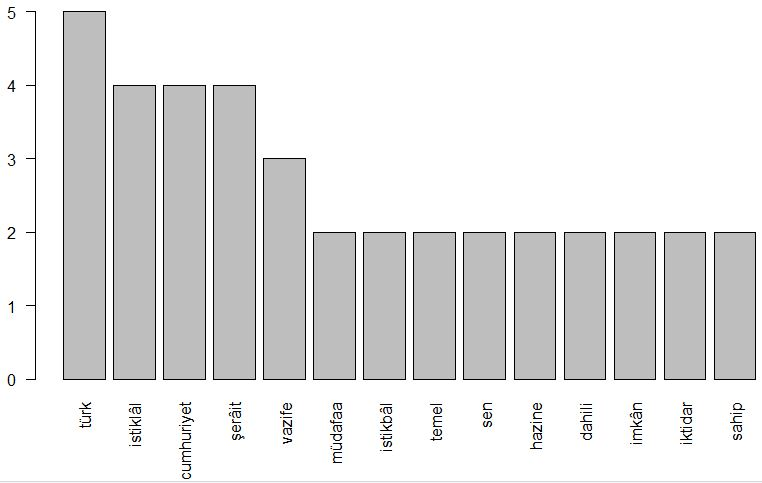

## SOLUTION 4

In [ ]:
address_freq <- sapply(address_list, length)
address_freq

barplot(sort(address_freq[address_freq > 1], decreasing = T), las = 2)

## QUESTION 5

Now let's do something fancier.

Write a function called **words_neigh** that takes three inputs:

- a word list as **lst** 
- a word as **wrd** 
- number of neighbouring words as **neigh**

**words_neigh** will extract all the words that appeared within **neigh** words before or after the word **wrd** and then return those words as well as their respective number of appearances in decreasing order as such: 

```R
words_neigh(lst = address_list, wrd = "cumhuriyet", neigh = 2)

  istiklâl       türk   ilelebed   muhafaza    müdafaa     bedhah mecburiyet    tezâhür  kastetmek     düşman  kurtarmak 
         4          2          1          1          1          1          1          1          1          1          1 
    muhtaç 
         1 
```
In the example above, we see that the word **istiklal** appeared 4 times within an interval of length 4 around **cumhuriyet**, whereas the word **türk** appeared 2 times.

Note that the sum of these numbers is 16 which equals to 4 times 4. (the word **cumhuriyet** appears 4 times in the address and the length of our interval is 4: 2 words on each side)

The default values for the inputs should be **address_list**, **cumhuriyet** and **2** respectively.

Let's check the neighbors of the word **türk** within the length of 3 words on each side:

```R
words_neigh(wrd = "türk", neigh = 3)

    vazife   istiklâl cumhuriyet    gençlik    birinci   ilelebed   muhafaza   istikbâl     şerâit    zaruret      harap 
         2          2          2          1          1          1          1          1          1          1          1 
     bitap      evlât      ahvâl  kurtarmak 
         1          1          1          1 
```



## SOLUTION 5

In [ ]:
words_neigh <- function(lst = address_list,
                        wrd = "cumhuriyet",
                        neigh = 2)
{
    indices <- lst[[wrd]] # the indices of that word
    
    # get the -/+neigh sequence of the indices
    neigh_indices <- sapply(indices,
                            function(x) seq(x - neigh, x + neigh))[T]

    # get whether the indices of each word intersect with the neighbouring indices
    # exclude the word itself
    neigh_freqs <- sapply(lst,
                          function(x) sum(x %in% neigh_indices))[-(which(names(lst) == wrd))]

    # sort by decreasing frequencies and filter for freqs above 0                      
    sort(neigh_freqs[neigh_freqs > 0], decreasing = T)
}
                          
words_neigh(lst = address_list, wrd = "cumhuriyet", neigh = 2)
words_neigh(wrd = "türk", neigh = 3)